# Administriación de grandes volúmenes de datos

In [1]:
from time import sleep

In [2]:
try:
    from dask import delayed
    print("Libreria: 'dask' esta instalada y se cargo correctamente")
except ModuleNotFoundError:
    print("Libreria: 'dask' no esta instalada, se debe instalar")
    !pip install dask
    from dask import delayed
    print("Libreria: 'dask' esta instalada y se cargo correctamente")

Libreria: 'dask' esta instalada y se cargo correctamente


In [11]:
!pip install graphviz

In [3]:
try:
    from nltk.corpus import stopwords
    print("Libreria: 'nltk' esta instalada y se cargo correctamente")
except ModuleNotFoundError:
    print("Libreria: 'nltk' no esta instalada, se debe instalar")
    !pip install nltk
    from nltk.corpus import stopwords

Libreria: 'nltk' esta instalada y se cargo correctamente


In [4]:
stop_words = stopwords.words("spanish")

In [5]:
#@dask.delayed
def remove_stopwords(words):
    sleep(2)
    filtered = filter(lambda word: word not in stop_words, words)
    return list(filtered)

In [6]:
def add(t1, t2,t3,t4):
    sleep(1)
    return t1 + t2 + t3 + t4

In [7]:
%%time
test_text1 = remove_stopwords(["Estamos","todos","muy","bien"])
test_text2 = remove_stopwords(["Somos","los","ultimos"])
test_text3 = remove_stopwords(["Se","podria","esperar","mas"])
test_text4 = remove_stopwords(["La","ulitma","oracion"])
print(add(test_text1, test_text2, test_text3, test_text4))

['Estamos', 'bien', 'Somos', 'ultimos', 'Se', 'podria', 'esperar', 'mas', 'La', 'ulitma', 'oracion']
Wall time: 9.06 s


In [8]:
%%time
test_text1 = delayed(remove_stopwords)(["Estamos","todos","muy","bien"])
test_text2 = delayed(remove_stopwords)(["Estamos","todos","muy","bien"])
test_text3 = delayed(remove_stopwords)(["Estamos","todos","muy","bien"])
te9st_text4 = delayed(remove_stopwords)(["Estamos","todos","muy","bien"])
total =  delayed(add)(test_text1, test_text2, test_text3, test_text4)

Wall time: 55.5 ms


In [9]:
%time total.compute()

Wall time: 3.23 s


['Estamos',
 'bien',
 'Estamos',
 'bien',
 'Estamos',
 'bien',
 'La',
 'ulitma',
 'oracion']

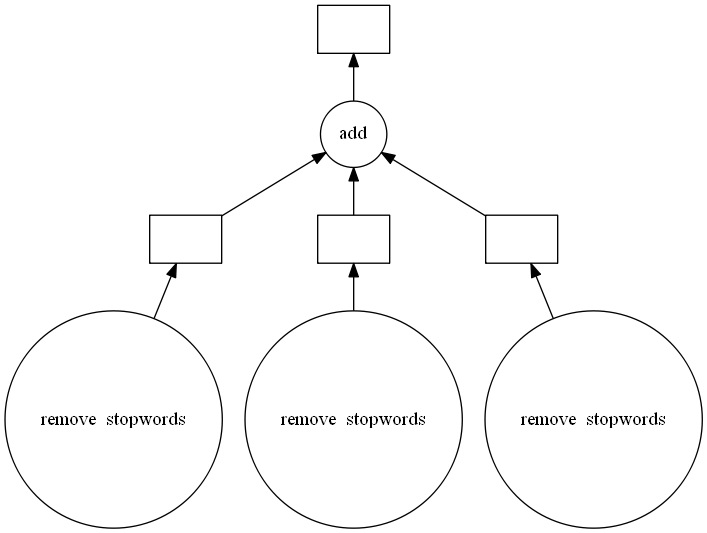

In [12]:
total.visualize()

______________________